## 정규분포로 바꿔주는 sklearn 패키지
- power_tranform
- 정규분포로 변환
---
- 정규뷴포로 변형
- 정규분포로 만들기 위해서는 해당 데이터의 분포의 왜도, 첨도를 보고를 보고 비대칭성을 확인
- 로그, 지수, 루트, 연수, 제곱 기타 정규분포화 만드는 방법이 존재
---
- 위의 패키지로 Box-cox 변환, yeo-johnson 변환으로 바꿔 정규분포화

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('data/walmart_cleaned.csv')

In [105]:
df_sp = df[:15000]
df_sp.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


- 정규분포로 바꿔주는 패키지

In [106]:
from sklearn.preprocessing import power_transform

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

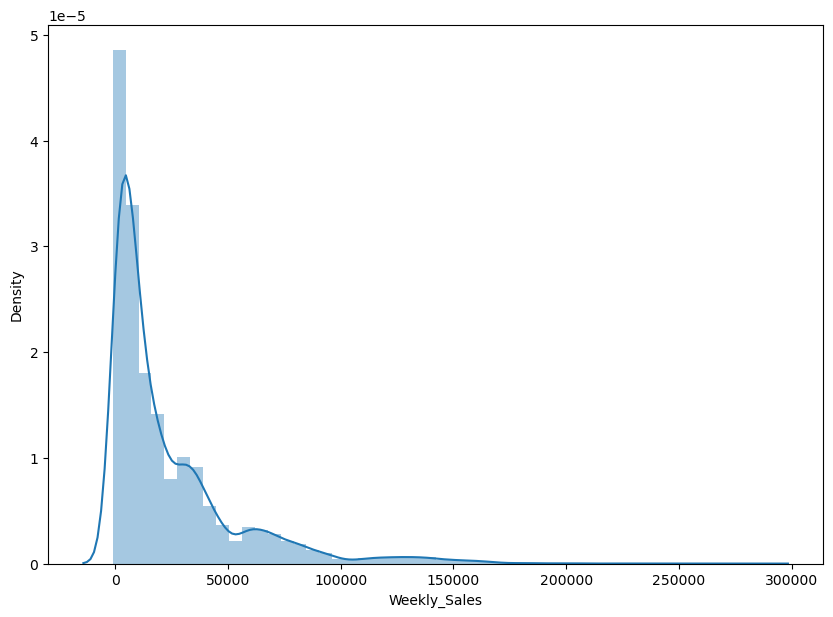

In [107]:
fig, axs = plt.subplots(figsize = (10,7))
sns.distplot(df_sp['Weekly_Sales'], ax = axs)

- Box-cox , yeo-johnson 변환 적용

In [108]:
# 위클리 세일즈 전처리
df_sp = df_sp[df_sp['Weekly_Sales']>0]

In [109]:
#여존슨변환
df_sp[['yeo-johnson']] = power_transform(df_sp[['Weekly_Sales']], standardize = False)

#Box-cox 변환
df_sp[['box-cox']] = power_transform(df_sp[['Weekly_Sales']], method = 'box-cox', standardize = False)

### 데이터의 분포 확인

<Axes: xlabel='box-cox', ylabel='Density'>

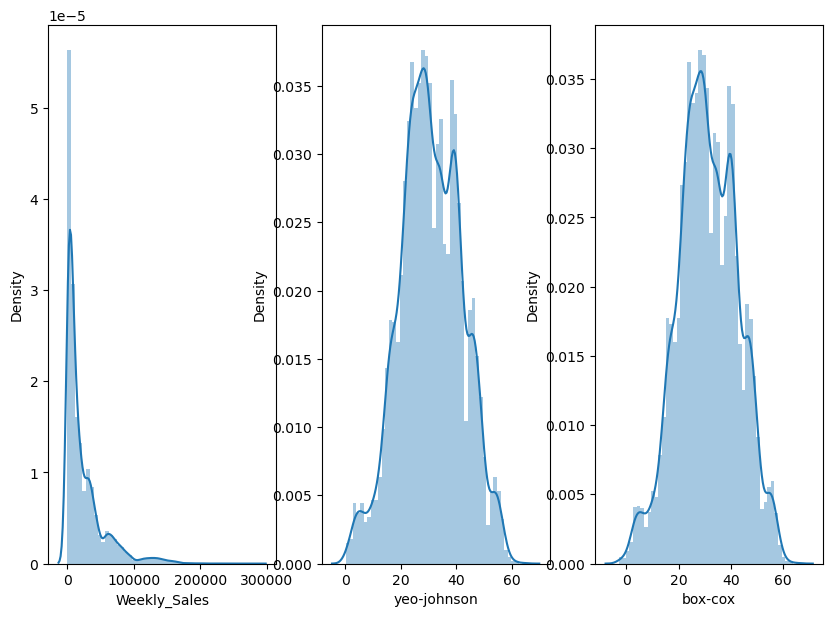

In [110]:
fig, axs = plt.subplots(ncols = 3, figsize = (10,7))
sns.distplot(df_sp['Weekly_Sales'], ax = axs[0])
sns.distplot(df_sp['yeo-johnson'], ax = axs[1])
sns.distplot(df_sp['box-cox'], ax = axs[2])

## bike_sharing_daily로 전처리 적용해보기

In [111]:
df = pd.read_csv('data/bike_sharing_daily.csv')

In [112]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [113]:
df_bs = df[['casual','cnt']].dropna()

In [114]:
df_bs_sp=df_bs[['casual','cnt']].dropna()

In [115]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


<Axes: xlabel='casual', ylabel='Density'>

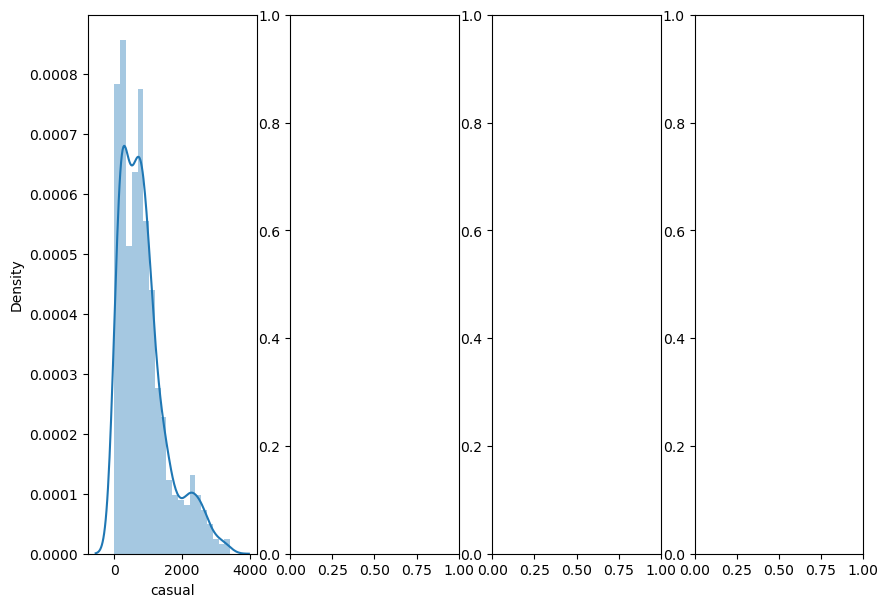

In [116]:
fig, axs = plt.subplots(ncols = 4, figsize = (10,7))
sns.distplot(df['casual'], ax = axs[0])
# sns.distplot(df_bs['atemp'], ax = axs[1])
# sns.distplot(df_bs['hum'], ax = axs[2])
# sns.distplot(df_bs['casual'], ax = axs[3])

- casual 변수가 정규분포인가? > qqplot 그려보고 shapiro 검정 진행해보기

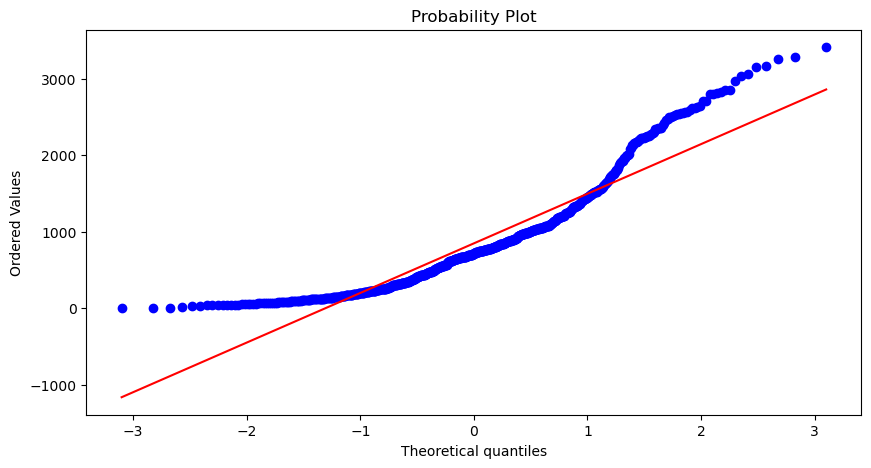

In [117]:
import scipy.stats as stats

plt.figure(figsize = (10,5))
stats.probplot(df_bs['casual'], dist = stats.norm, plot = plt)
plt.show() # 생각보다 정규분포로 보이지 않음

In [118]:
# shapiro 검정
from scipy.stats import shapiro
import numpy as np

stat, p = shapiro(df_bs['casual'])

alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('reject H0')

reject H0


- 정규분포로 변환

In [119]:
#여존슨변환
df_bs_sp[['yeo-johnson']] = power_transform(df_bs_sp[['casual']], standardize = False)

#Box-cox 변환
df_bs_sp[['box-cox']] = power_transform(df_bs_sp[['casual']], method = 'box-cox', standardize = False)

<Axes: xlabel='yeo-johnson', ylabel='Density'>

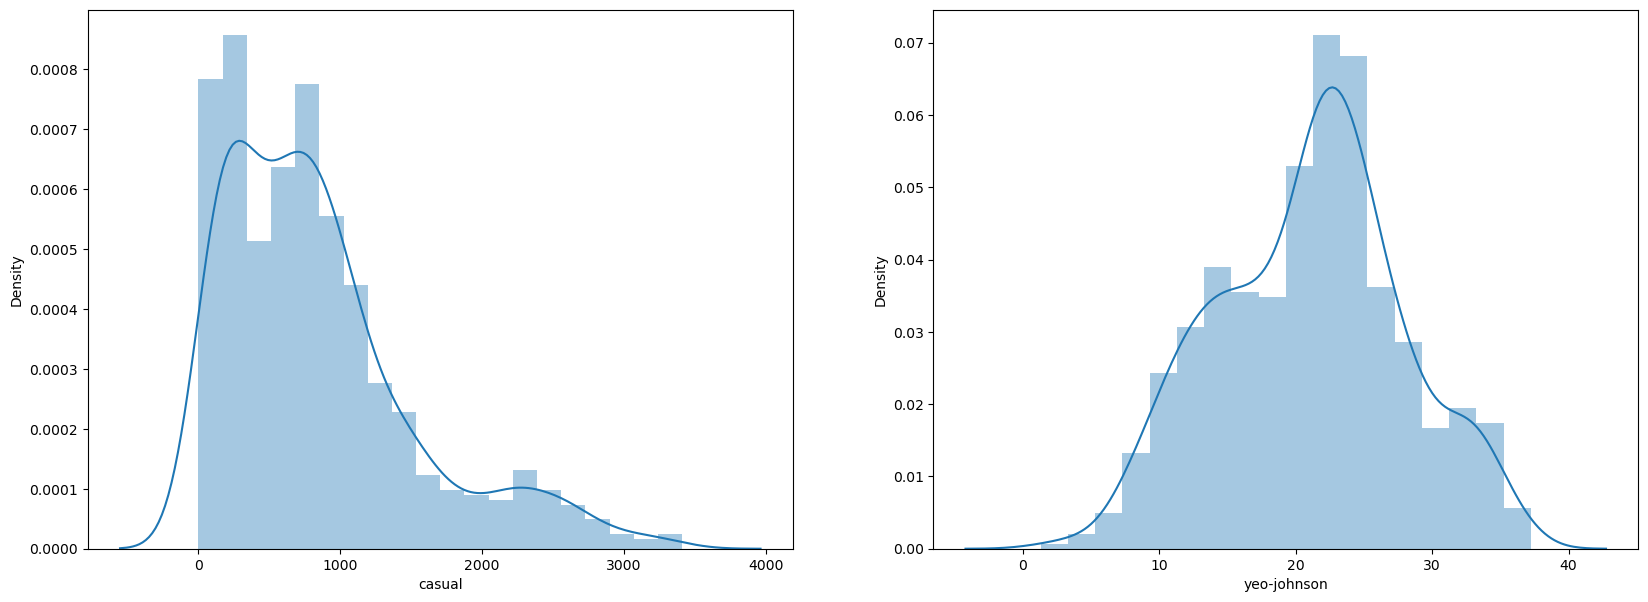

In [120]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,7))
sns.distplot(df_bs_sp['casual'], ax = axs[0])
sns.distplot(df_bs_sp['yeo-johnson'], ax = axs[1])

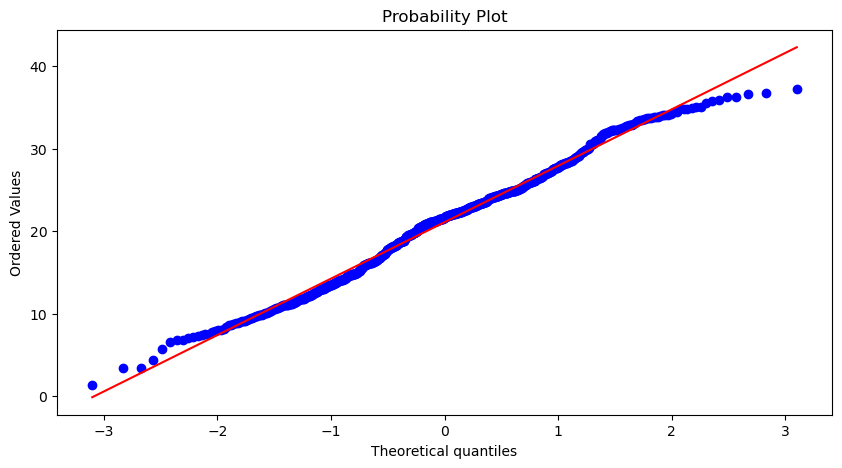

In [121]:
import scipy.stats as stats

plt.figure(figsize=(10,5))
stats.probplot(df_bs_sp['yeo-johnson'],dist = stats.norm, plot=plt)
plt.show()

In [122]:
# Shapiro 검정

from scipy.stats import shapiro
import numpy as np

stat, p =shapiro(df_bs_sp['yeo-johnson'])

alpha = 0.05
if p>alpha:
    print('Fail to reject H0')
else:
    print('reject H0')

reject H0


- 간단한 선형회귀를 통해서 실제 정규분포로 변환했을 때 rmse값 자체의 변화나 R2 변화가 있는지
- 잔차에 대한 변화와 결정계수에 대한 변화

### 정규분포로 변환한 경우/아닌 경우, 회귀분석을 통한 확인

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [124]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [125]:
df_bs_2x=df[['casual','hum','cnt']].dropna()

In [126]:
df_X = np.array(df_bs_2x['casual']).reshape(-1,1) # x 피처를 따로 빼고 넘파이 어레이로 변환
X_train, X_test, y_train,y_test = train_test_split(df_X, df_bs_2x['cnt'],test_size = 0.3,random_state = 111)

In [127]:
model = LinearRegression() # 선형회귀 모델 학습
model.fit(X_train, y_train) # 모델 학습
y_pred = model.predict(X_test) # X_test로 예측값 추출

In [128]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1417.747007204211


In [129]:
df_bs.corr()

,casual,cnt
casual,1.000000,0.674468
cnt,0.674468,1.000000


In [131]:
X = sm.add_constant(df_X)
model_ols = sm.OLS(df_bs['cnt'], df_bs['casual']).fit()
summary = model_ols.summary()

In [132]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              2516.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                   5.09e-237
Time:                        18:53:50   Log-Likelihood:                         -6597.9
No. Observations:                 720   AIC:                                  1.320e+04
Df Residuals:                     719   BIC:                                  1.320e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
casual         3.9613      0.079     50.163      0.000       3.806       4.116
==============================================================================
Omnibus:                       94.146   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.561
Skew:                          -0.979   Prob(JB):                     7.35e-29
Kurtosis:                       3.698   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- base RMSE : 1472
- corr : 0.6744

- 정규분포로 변환

In [138]:
#여존슨변환
df_bs_2x[['yeo-johnson']] = power_transform(df_bs_2x[['casual']], standardize = False)

#Box-cox 변환
df_bs_2x[['box-cox']] = power_transform(df_bs_2x[['casual']], method = 'box-cox', standardize = False)#여존슨변환


In [139]:
df_X = np.array(df_bs_2x['yeo-johnson']).reshape(-1,1) # x 피처를 따로 빼고 넘파이 어레이로 변환
X_train, X_test, y_train,y_test = train_test_split(df_X, df_bs_2x['cnt'],test_size = 0.3,random_state = 111)

In [140]:
model1 = LinearRegression() # 선형회귀 모델 학습
model1.fit(X_train, y_train) # 모델 학습
y_pred = model1.predict(X_test) # X_test로 예측값 추출

In [141]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse) # 줄어듦

1210.3865671901444


In [142]:
df_bs_2x.corr()

,casual,hum,cnt,yeo-johnson,box-cox
casual,1.000000,-0.089279,0.676972,0.938495,0.938617
hum,-0.089279,1.000000,-0.105656,-0.100852,-0.101015
cnt,0.676972,-0.105656,1.000000,0.764566,0.764455
yeo-johnson,0.938495,-0.100852,0.764566,1.000000,0.999997
box-cox,0.938617,-0.101015,0.764455,0.999997,1.000000


In [145]:
X = sm.add_constant(df_X)
model_ols1= sm.OLS(df_bs_2x['cnt'], df_bs_2x['yeo-johnson']).fit()
summary1 = model_ols1.summary()
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              9928.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:01:55   Log-Likelihood:                         -5946.4
No. Observations:                 695   AIC:                                  1.189e+04
Df Residuals:                     694   BIC:                                  1.190e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yeo-johnson   222.1981      2.230     99.642      0.000     217.820     226.576
==============================================================================
Omnibus:                       22.619   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.174
Skew:                           0.060   Prob(JB):                      0.00375
Kurtosis:                       2.390   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""